### Why Transformers?

- Game Changer in Modern NLP




### Drawbacks of RNN

#![Alt Text](https://miro.medium.com/max/960/1*TqcA9EIUF-DGGTBhIx_qbQ.gif)


- sequential processing

- long term dependency

Example - I’m attending the Robotics and Vision Conference this year, so I will be in ____ for a week. To predict the word, you need to have more context.

### Transformers

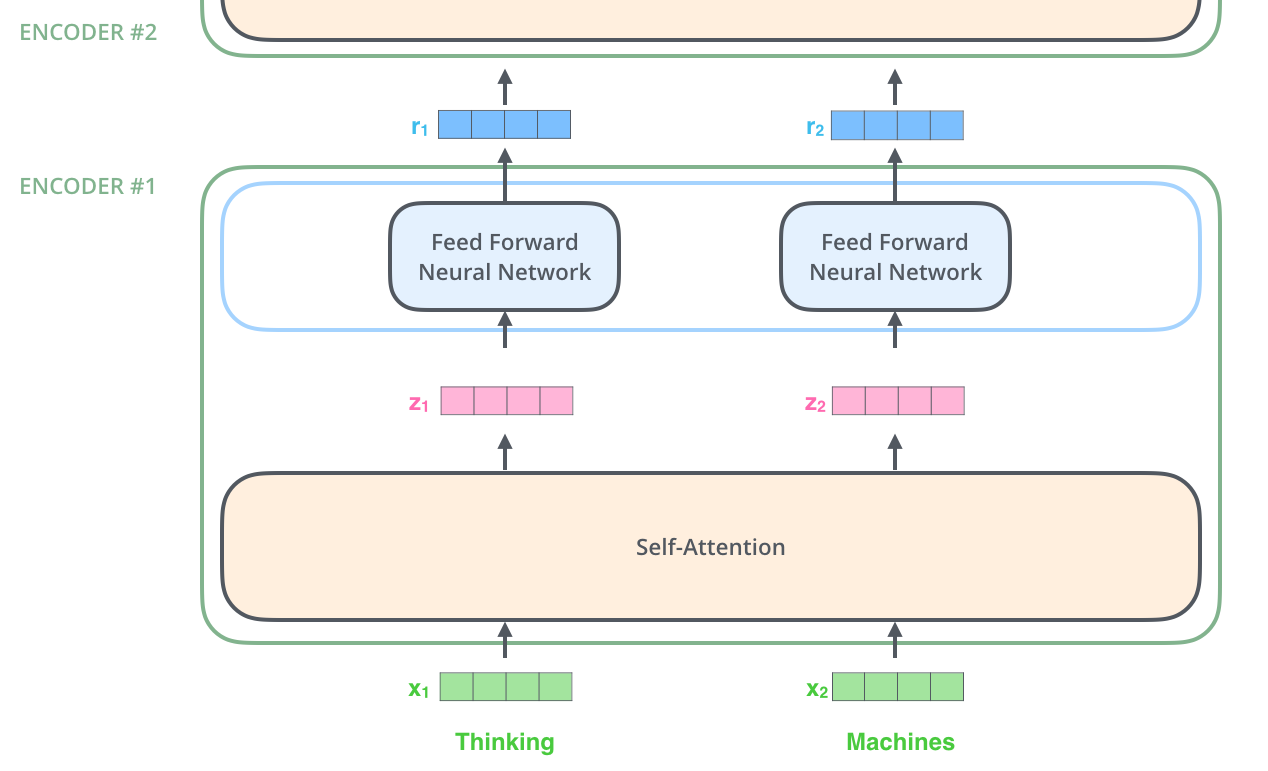

In [1]:
!pip install -U sentence-transformers

     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 2.6 MB 12.9 MB/s 
     |████████████████████████████████| 1.2 MB 59.8 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 636 kB 58.4 MB/s 
     |████████████████████████████████| 895 kB 68.7 MB/s 
     |████████████████████████████████| 3.3 MB 61.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=ea3264693c6237f33c8243ff61ce3050f63c2121a25e1cad97c44c12266271b2
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer

In [3]:
combined_df = pd.read_csv("/content/combined_Dataset.csv")
combined_df.head()

,name,category,founded_at,closed_at,success,cause,num_founders,num_employees,num_funding_rounds,total_funding_amount,num_investors,Description,full_failure_cause,year_closed,year_started,city
0,Rafter,Education,2006,2016,1,Competition,1.0,50 to 100,7,86000000,7,Rafter was a textbook and course material prov...,Rafter had much competition from the start and...,2016.0,2006.0,NaN
1,Skully,Transportation,2013,2016,0,Mismanagement of Funds,1.0,10 to 50,4,15000000,13,Skully is a helmet trademark which targets mot...,According to Skully spokespeople they had to c...,2016.0,2013.0,NaN
2,Wantful,e-Commerce,2011,2013,0,Competition,1.0,10000,1,5500000,8,Wantful was an e-Commerce platform founded in ...,After experiencing a brief phase of exponentia...,2013.0,2011.0,NaN
3,Argyle Social,Marketing,2010,2014,0,Competition,1.0,10 to 50,2,1600000,2,The Argyle Social was a Social media marketing...,"Adam Covati, the former CEO and founder of Arg...",2014.0,2010.0,NaN
4,QBotix,Software & Hardware,2010,2015,1,Competition,1.0,10 to 50,3,23500000,7,QBotix seemed like a very promising cleantech ...,QBotix had a useful and innovative product. Th...,2015.0,2010.0,NaN


In [6]:
combined_df.shape

(1841, 16)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1841 non-null   object 
 1   category              1841 non-null   object 
 2   founded_at            1841 non-null   int64  
 3   closed_at             1841 non-null   int64  
 4   success               1841 non-null   int64  
 5   cause                 77 non-null     object 
 6   num_founders          1373 non-null   float64
 7   num_employees         77 non-null     object 
 8   num_funding_rounds    1841 non-null   int64  
 9   total_funding_amount  1841 non-null   int64  
 10  num_investors         77 non-null     object 
 11  Description           1841 non-null   object 
 12  full_failure_cause    77 non-null     object 
 13  year_closed           77 non-null     float64
 14  year_started          77 non-null     float64
 15  city                 

In [8]:
descriptions = combined_df["Description"]
descriptions

0       Rafter was a textbook and course material prov...
1       Skully is a helmet trademark which targets mot...
2       Wantful was an e-Commerce platform founded in ...
3       The Argyle Social was a Social media marketing...
4       QBotix seemed like a very promising cleantech ...
                              ...                        
1836    IndustryTrader.com is an online marketplace fo...
1837                                   PictureMe Universe
1838    Spry Hive Industries develops rich internet, d...
1839    CB Biotechnologies is a company engaged in the...
1840    Farallon Biosciences is a company focused on t...
Name: Description, Length: 1841, dtype: object

In [9]:
model_name = 'paraphrase-mpnet-base-v2'
model = SentenceTransformer(model_name)

In [10]:
sentence_vecs = model.encode(descriptions)

In [11]:
sentence_vecs.shape

(1841, 768)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [13]:
combined_df['founded_at'][0]

2006

In [ ]:

v = [1,10,3,4]

sentence_vecs[v]

array([[ 0.05452662, -0.11629937,  0.03126047, ...,  0.09796815,
        -0.02142642, -0.15127358],
       [ 0.02412324, -0.2520958 , -0.05253113, ...,  0.14904483,
         0.10976832, -0.03664327],
       [-0.06917287, -0.34267676, -0.02585829, ...,  0.23933685,
         0.04885688,  0.01062587],
       [ 0.06330923, -0.18265504, -0.09313249, ..., -0.05947317,
         0.07889096,  0.05552674]], dtype=float32)

- find the list of indices of companies which fall in the time period of the given company

In [ ]:
combined_df['closed_at'].value_counts()

In [16]:
#combined_df['closed_at'].replace({"Active":"2021"},inplace=True)

In [17]:
combined_df['closed_at'] = combined_df['closed_at'].astype('int64')

In [18]:
from tqdm import tqdm

In [19]:
same_time_period_list = {}

for idx in tqdm(range(combined_df.shape[0])):
  index_list = []
  for j in range(combined_df.shape[0]):
    if (combined_df['founded_at'][idx] <= combined_df['founded_at'][j] <= combined_df['closed_at'][idx]) or \
       (combined_df['founded_at'][idx] <= combined_df['closed_at'][j] <= combined_df['closed_at'][idx]):
       index_list.append(j)

  same_time_period_list[idx] = index_list     

100%|██████████| 1841/1841 [01:23<00:00, 22.09it/s]


In [20]:
same_time_period_list[0]
sim_total_list = []

Top 50 and TOp 100

In [21]:
THRESHOLD_LIST  = [0.40,0.42,0.45,0.50]
for THRESHOLD in tqdm(THRESHOLD_LIST):

  sim_count_list = []

  for idx in range(sentence_vecs.shape[0]):

    sim_list = cosine_similarity([sentence_vecs[idx]],sentence_vecs[same_time_period_list[idx]])
    sorted_indexes = np.argsort(sim_list[0])[::-1]

    sim_count = [index for index in sorted_indexes[1:50] if sim_list[0][index] > THRESHOLD]
    sim_count_list.append(len(sim_count))

  sim_total_list.append(sim_count_list)

  print(f'Threshold : {THRESHOLD}  Mean. Count : {np.mean(sim_count_list):.2f}')

 25%|██▌       | 1/4 [00:10<00:31, 10.50s/it]

Threshold : 0.4  Mean. Count : 17.52


 50%|█████     | 2/4 [00:20<00:20, 10.29s/it]

Threshold : 0.42  Mean. Count : 11.54


 75%|███████▌  | 3/4 [00:30<00:10, 10.20s/it]

Threshold : 0.45  Mean. Count : 5.83


100%|██████████| 4/4 [00:40<00:00, 10.07s/it]

Threshold : 0.5  Mean. Count : 1.76


In [23]:
# For threshold 0.5
len(sim_total_list)

4

In [ ]:
sim_total_list[0]

In [25]:
combined_df['Similarity_Count_0.4'] = sim_total_list[0]
combined_df['Similarity_Count_0.42'] = sim_total_list[1]
combined_df['Similarity_Count_0.45'] = sim_total_list[2]
combined_df['Similarity_Count_0.50'] = sim_total_list[3]

In [5]:
combined_df['success'].value_counts()

0    1688
1     153
Name: success, dtype: int64

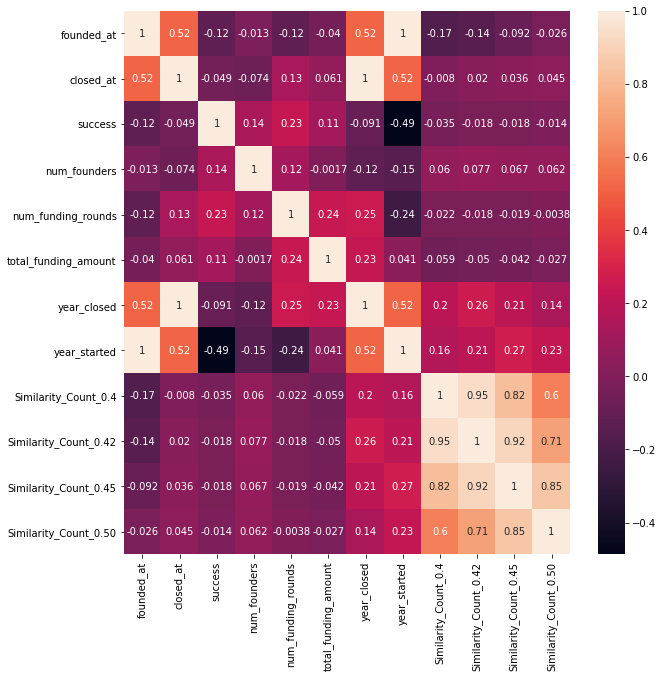

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = combined_df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation,annot=True)

In [ ]:
wp_df.to_csv("word_piece_based_with_simcount.csv")

TOP 50

Threshold - 0.40 , Mean Count : 67.5

Threshold - 0.42 , Mean Count : 55.79

Threshold - 0.45 , Mean Count : 37.03

Threshold - 0.50 , Mean Count : 14.55



--  Example --

top 50 similarity scores

In [ ]:
import numpy as np

sorted_indexes = np.argsort(sim_list[0])[::-1]
print("query=", descriptions[1000])
for idx in sorted_indexes[1:50]:
    if sim_list[0][idx] > 0.300:
      print(f'{idx} \t {sim_list[0][idx]:0.3f} \t {descriptions[idx]}')


query= postalytics selfserve direct mail automation tool look act feel like digital channel
679 	 0.647 	 big mail project integrated direct mail system printing shipping addressing monitoring direct mail via online app
1240 	 0.497 	 smart shopping email alias happier inbox
1612 	 0.495 	 ecosystemai provider prediction digital platform bring fullstack perspective intelligent automation
2201 	 0.478 	 home online platform provides automated preventative maintenance notification
2670 	 0.469 	 trustplace digital platform support automates frontline operation
2845 	 0.469 	 trustplace digital platform support automates frontline operation
2626 	 0.464 	 spoolify ai platform connecting service skill maritime
983 	 0.464 	 privops offer digital transformation platform control data
240 	 0.462 	 consumeroptix front office insurtech company brings intelligent automation personalization consumer insurance distribution
267 	 0.462 	 consumeroptix front office insurtech company brings intellig

### Results using other Transformers Model by Christian

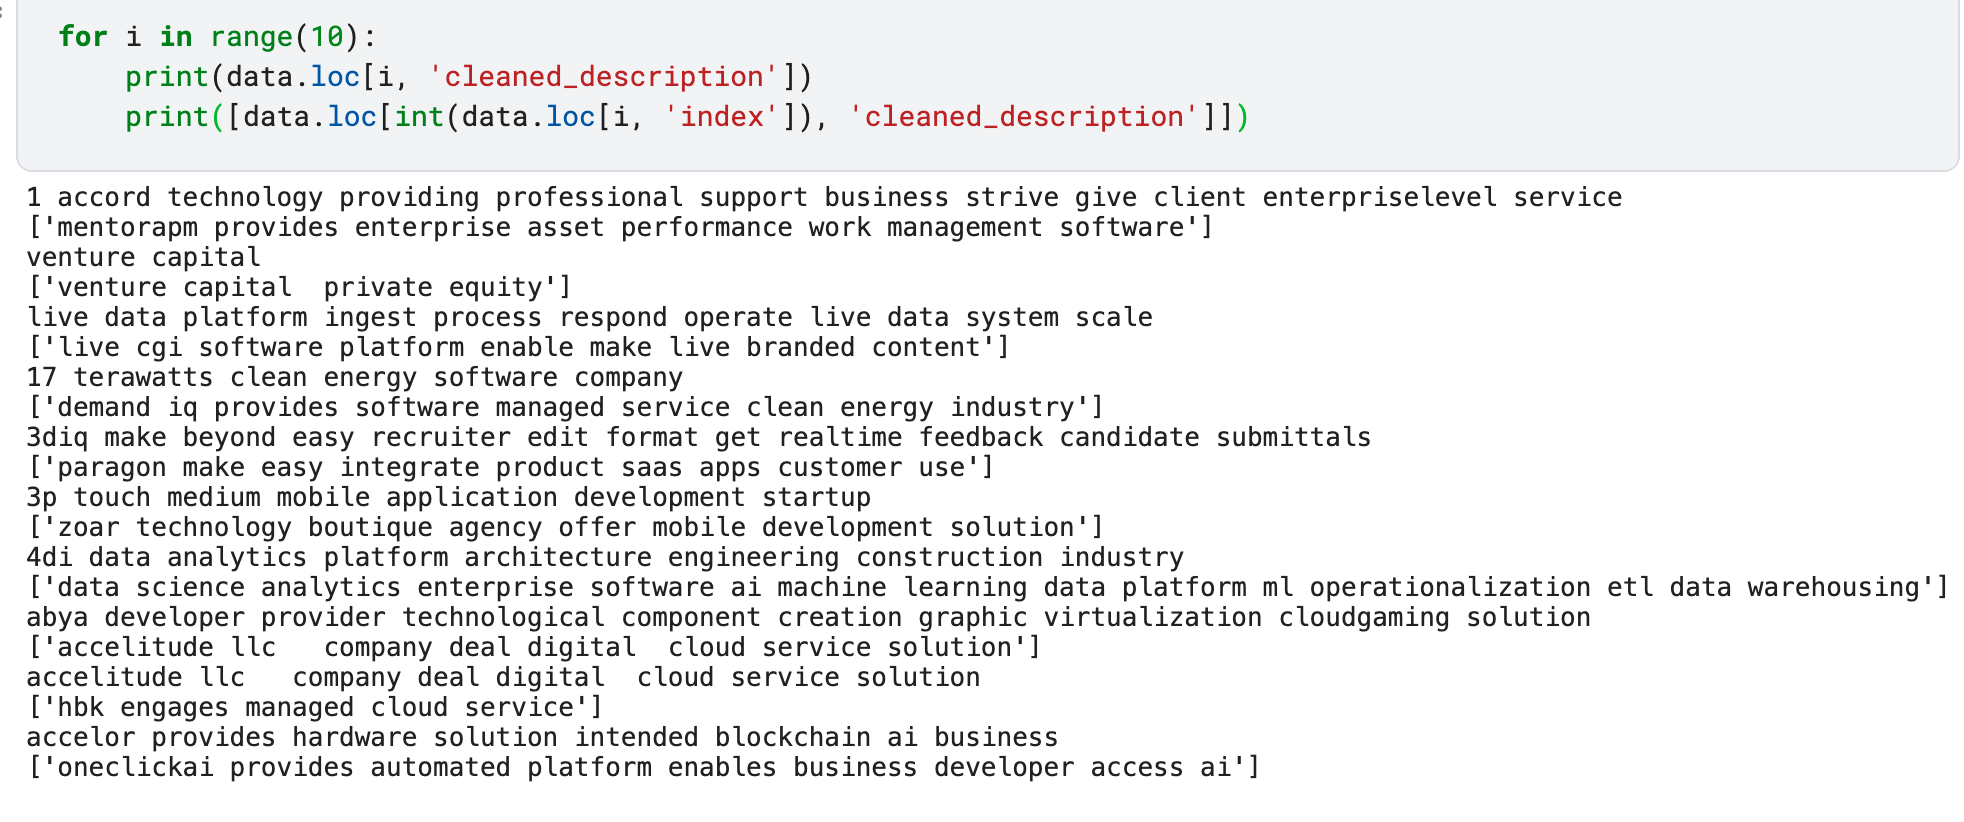